<a href="https://colab.research.google.com/github/kmodi1428/my_classwork/blob/main/HDFC_Small_cap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [ ]:
data = pd.read_csv("/content/HDFC Small Cap.csv")
data

,K,Date,Ruppes
0,NaN,12-04-2024,138.656
1,NaN,12-04-2024,139.371
2,NaN,12-04-2024,139.009
3,NaN,12-04-2024,139.227
4,NaN,12-04-2024,138.529
...,...,...,...
221,NaN,12-04-2024,97.081
222,NaN,12-04-2024,96.798
223,NaN,12-04-2024,97.241
224,NaN,12-04-2024,97.106


In [ ]:
#  check missing values

data.isnull().sum()


K         226
Date        0
Ruppes      0
dtype: int64

In [ ]:
  # Handle outliers
# One common method is to detect outliers using statistical methods like z-score or IQR (Interquartile Range)
# Here's an example of using z-score to detect and remove outliers in 'Price' column:
z_scores = np.abs((data['Ruppes'] - data['Ruppes'].mean()) / data['Ruppes'].std())
threshold = 3
df = data[z_scores < threshold]
df

,K,Date,Ruppes
0,NaN,12-04-2024,138.656
1,NaN,12-04-2024,139.371
2,NaN,12-04-2024,139.009
3,NaN,12-04-2024,139.227
4,NaN,12-04-2024,138.529
...,...,...,...
221,NaN,12-04-2024,97.081
222,NaN,12-04-2024,96.798
223,NaN,12-04-2024,97.241
224,NaN,12-04-2024,97.106


In [ ]:
#check and remove duplicate

df.drop_duplicates(inplace=True)

df

,K,Date,Ruppes
0,NaN,12-04-2024,138.656
1,NaN,12-04-2024,139.371
2,NaN,12-04-2024,139.009
3,NaN,12-04-2024,139.227
4,NaN,12-04-2024,138.529
...,...,...,...
221,NaN,12-04-2024,97.081
222,NaN,12-04-2024,96.798
223,NaN,12-04-2024,97.241
224,NaN,12-04-2024,97.106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 0 to 225
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   K       0 non-null      float64
 1   Date    225 non-null    object 
 2   Ruppes  225 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.1+ KB


In [ ]:
df.drop(columns=['K'],inplace=True)


In [ ]:
data.dtypes

K         float64
Date       object
Ruppes    float64
dtype: object

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'date_column' is the column containing date strings
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Convert datetime to float (number of days since a reference date)
reference_date = pd.Timestamp("1900-01-01")  # You can choose any reference date
df['Date'] = (df['Date'] - reference_date).dt.days.astype(float)

# Now the 'date_column' contains the dates represented as floats



In [ ]:
# Convert data types
# Assuming 'Date' column is in string format, converting it to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Assuming 'Price' column is in string format, converting it to numeric
df['Ruppes'] = pd.to_numeric(df['Ruppes'])


In [ ]:
df.drop_duplicates()

,Date,Ruppes
0,1970-01-01 00:00:00.000045392,138.656
1,1970-01-01 00:00:00.000045392,139.371
2,1970-01-01 00:00:00.000045392,139.009
3,1970-01-01 00:00:00.000045392,139.227
4,1970-01-01 00:00:00.000045392,138.529
...,...,...
221,1970-01-01 00:00:00.000045392,97.081
222,1970-01-01 00:00:00.000045392,96.798
223,1970-01-01 00:00:00.000045392,97.241
224,1970-01-01 00:00:00.000045392,97.106


In [ ]:
df.head()

,Date,Ruppes
0,1970-01-01 00:00:00.000045392,138.656
1,1970-01-01 00:00:00.000045392,139.371
2,1970-01-01 00:00:00.000045392,139.009
3,1970-01-01 00:00:00.000045392,139.227
4,1970-01-01 00:00:00.000045392,138.529


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
data.describe()

,K,Ruppes
count,0.0,226.000000
mean,NaN,119.817876
std,NaN,12.054290
min,NaN,96.495000
25%,NaN,111.006750
50%,NaN,118.441500
75%,NaN,130.785000
max,NaN,139.371000


In [ ]:
!pip install seaborn


In [ ]:
import seaborn as sns

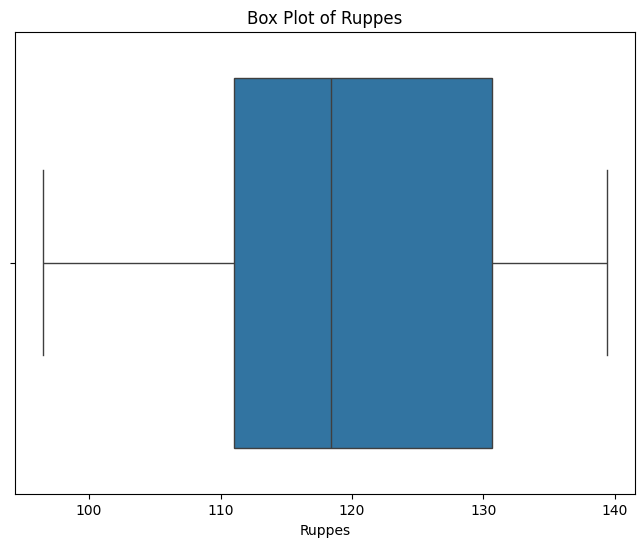

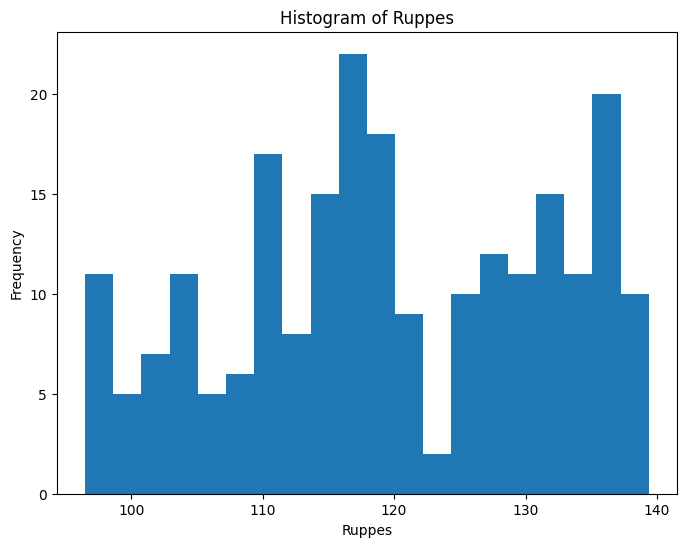

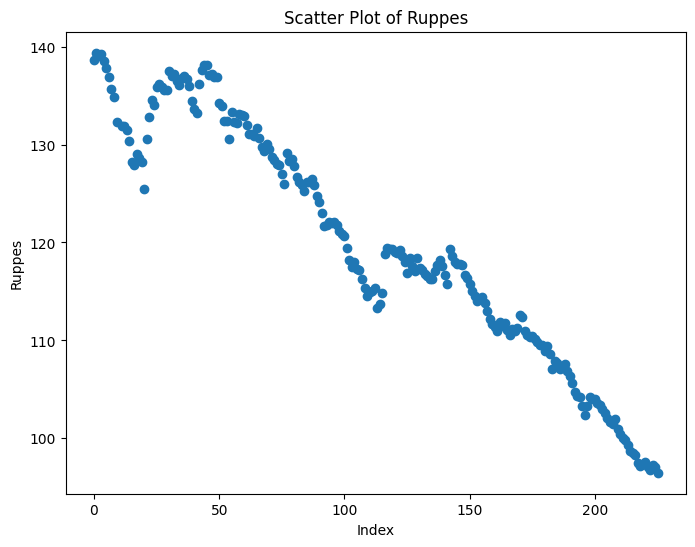

Outliers based on Z-score:
Empty DataFrame
Columns: [Date, Ruppes]
Index: []
Outliers based on IQR:
Empty DataFrame
Columns: [Date, Ruppes]
Index: []


In [ ]:
z_scores = (df["Ruppes"] - df["Ruppes"].mean()) / df["Ruppes"].std()
outliers_z = df[abs(z_scores) > 3]

Q1 = df["Ruppes"].quantile(0.25)
Q3 = df["Ruppes"].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df["Ruppes"] < Q1 - 1.5 * IQR) | (df["Ruppes"] > Q3 + 1.5 * IQR)]

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x= "Ruppes")
plt.title("Box Plot of " + "Ruppes")
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df["Ruppes"], bins=20)
plt.title("Histogram of " + "Ruppes")
plt.xlabel("Ruppes")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df.index, df["Ruppes"])
plt.title("Scatter Plot of " + "Ruppes")
plt.xlabel("Index")
plt.ylabel("Ruppes")
plt.show()

print("Outliers based on Z-score:")
print(outliers_z)
print("Outliers based on IQR:")
print(outliers_iqr)

In [ ]:
df


,Date,Ruppes
0,1970-01-01 00:00:00.000045392,138.656
1,1970-01-01 00:00:00.000045392,139.371
2,1970-01-01 00:00:00.000045392,139.009
3,1970-01-01 00:00:00.000045392,139.227
4,1970-01-01 00:00:00.000045392,138.529
...,...,...
221,1970-01-01 00:00:00.000045392,97.081
222,1970-01-01 00:00:00.000045392,96.798
223,1970-01-01 00:00:00.000045392,97.241
224,1970-01-01 00:00:00.000045392,97.106


In [176]:
import pandas as pd

# Assuming 'df' is your DataFrame containing 'Date' and 'Rupees' columns

# Convert 'Date' column to datetime format


# Feature Engineering
# Create lag features to capture temporal dependencies
num_lags = 5  # Number of lag features to create
for i in range(1, num_lags + 1):
    df[f'Ruppes_Lag_{i}'] = df['Ruppes'].shift(i)

# Create moving averages to capture trends
window_sizes = [5, 10, 20]  # Window sizes for moving averages
for window in window_sizes:
    df[f'MA_{window}'] = df['Ruppes'].rolling(window=window).mean()

# Create volatility measures
volatility_window = 5
df['Volatility'] = df['Ruppes'].rolling(window=volatility_window).std()

# Create other relevant features based on domain knowledge or experimentation

# Drop rows with missing values resulting from lag features and moving averages
df.dropna(inplace=True)

# Print the DataFrame with engineered features
print(df.head())


                            Date   Ruppes  Ruppes_Lag_1  Ruppes_Lag_2  \
77 1970-01-01 00:00:00.000045392  129.116       125.943       126.977   
78 1970-01-01 00:00:00.000045392  128.364       129.116       125.943   
79 1970-01-01 00:00:00.000045392  128.471       128.364       129.116   
80 1970-01-01 00:00:00.000045392  127.831       128.471       128.364   
81 1970-01-01 00:00:00.000045392  126.711       127.831       128.471   

    Ruppes_Lag_3  Ruppes_Lag_4  Ruppes_Lag_5      MA_5     MA_10      MA_20  \
77       127.913       127.962       128.430  127.5822  128.3966  130.00155   
78       126.977       127.913       127.962  127.6626  128.3023  129.76170   
79       125.943       126.977       127.913  127.7742  128.1462  129.53680   
80       129.116       125.943       126.977  127.9450  127.9703  129.28430   
81       128.364       129.116       125.943  128.0986  127.7718  129.02260   

    Volatility  
77    1.189481  
78    1.234312  
79    1.286725  
80    1.208768  
8

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing historical SIP data

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Ensure numerical columns have float data type
# For example, if 'Rupees' column is numerical and not of float type
df['Ruppes'] = df['Ruppes'].astype(float)

# Now perform your feature engineering or selection

# Example:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract feature correlations with the target variable (SIP prices)
# Assuming 'Rupees' is the target column
feature_correlation_with_target = correlation_matrix['Ruppes'].drop('Ruppes')

# Print feature correlations with the target variable
print("\nFeature Correlation with Target Variable:")
print(feature_correlation_with_target)

# Select features with absolute correlation above a threshold (e.g., 0.5)
selected_features_corr = feature_correlation_with_target[abs(feature_correlation_with_target) > 0.5].index.tolist()

# Print selected features based on correlation analysis
print("\nSelected Features based on Correlation Analysis:")
print(selected_features_corr)

# Continue with feature selection or engineering based on your requirements


Correlation Matrix:
              Date    Ruppes  Ruppes_Lag_1  Ruppes_Lag_2  Ruppes_Lag_3  \
Date           NaN       NaN           NaN           NaN           NaN   
Ruppes         NaN  1.000000      0.996555      0.992895      0.989087   
Ruppes_Lag_1   NaN  0.996555      1.000000      0.996507      0.992790   
Ruppes_Lag_2   NaN  0.992895      0.996507      1.000000      0.996458   
Ruppes_Lag_3   NaN  0.989087      0.992790      0.996458      1.000000   
Ruppes_Lag_4   NaN  0.986169      0.988926      0.992687      0.996390   
Ruppes_Lag_5   NaN  0.982775      0.985971      0.988776      0.992576   
MA_5           NaN  0.995843      0.997845      0.998571      0.997774   
MA_10          NaN  0.990618      0.993064      0.994940      0.996175   
MA_20          NaN  0.982533      0.984199      0.985802      0.987284   
Volatility     NaN  0.357112      0.341357      0.323282      0.306414   

              Ruppes_Lag_4  Ruppes_Lag_5      MA_5     MA_10     MA_20  \
Date             

In [ ]:



# Feature Importance using Random Forest
# Assuming 'X' is the DataFrame containing features and 'y' is the target variable (SIP prices)
X = df.drop('Ruppes', axis=1)  # Assuming 'Ruppes' is the target column
y = df['Ruppes']




In [ ]:
print(X.dtypes)
print(y.dtypes)

Date            datetime64[ns]
Ruppes_Lag_1           float64
Ruppes_Lag_2           float64
Ruppes_Lag_3           float64
Ruppes_Lag_4           float64
Ruppes_Lag_5           float64
MA_5                   float64
MA_10                  float64
MA_20                  float64
Volatility             float64
dtype: object
float64


In [ ]:
for i, dtype in enumerate(X.dtypes):
    if dtype == np.dtype("datetime64[D]"):
        print(f"Feature with mismatched data type: {X.columns[i]}")

In [ ]:
from datetime import datetime
print(type(X["Date"].iloc[0]))


def convert_datetime_to_float(date_string):
    date = datetime.strptime(date_string, "%Y-%m-%d")
    return date.timestamp()

X["Date"] = X["Date"].apply(lambda date: convert_datetime_to_float(date.strftime("%Y-%m-%d")))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# Train Random Forest model to get feature importances
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, y)



RandomForestRegressor()

In [ ]:
# Extract feature importances
feature_importances = rf.feature_importances_

In [ ]:
# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Print feature importances
print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
        Feature  Importance
1  Ruppes_Lag_1    0.185872
6          MA_5    0.177882
2  Ruppes_Lag_2    0.156793
8         MA_20    0.150910
7         MA_10    0.108757
4  Ruppes_Lag_4    0.090440
3  Ruppes_Lag_3    0.073248
5  Ruppes_Lag_5    0.055231
9    Volatility    0.000866
0          Date    0.000000


In [ ]:
# Select top features based on importance (e.g., top 5 features)
selected_features_importance = feature_importance_df.head(5)['Feature'].tolist()

# Print selected features based on feature importance
print("\nSelected Features based on Feature Importance:")
print(selected_features_importance)


Selected Features based on Feature Importance:
['Ruppes_Lag_1', 'MA_5', 'Ruppes_Lag_2', 'MA_20', 'MA_10']


In [ ]:
# splite

import pandas as pd
from sklearn.model_selection import train_test_split


# Sort the DataFrame by date in ascending order to ensure chronological order
df_sorted = df.sort_values(by='Date')

# Define the percentage split for training and testing data
train_size = 0.8  # 80% for training, 20% for testing

# Calculate the index to split the data
split_index = int(train_size * len(df_sorted))

# Split the data into training and testing sets
train_data = df_sorted[:split_index]
test_data = df_sorted[split_index:]

# Optionally, you can further split the data into features (X) and target variable (y)
X_train = train_data.drop(columns=['Ruppes'])  # Drop the target column 'SIP_Price'
y_train = train_data['Ruppes']

X_test = test_data.drop(columns=['Ruppes'])
y_test = test_data['Ruppes']

# Print the shapes of training and testing data to verify the split
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (164, 11)
Testing data shape: (42, 11)


# model building


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 4.505372453742251e-27
Mean Absolute Error (MAE): 5.176811360537873e-14


In [173]:
y_pred

array([135.51575   , 137.509     ,  97.417     , 119.38366667,
       125.8195    , 118.829     , 103.404     , 107.36233333,
       111.6165    , 103.404     , 118.829     , 107.36233333,
       125.8195    , 103.404     , 122.04933333, 115.27533333,
       136.87375   , 110.854     , 113.794     , 107.36233333,
       128.07966667, 111.6165    , 119.38366667, 136.87375   ,
       137.8205    , 136.87375   , 104.35166667, 103.404     ,
       100.19125   ,  98.517     , 125.8195    , 115.27533333,
       107.36233333, 111.6165    , 116.34733333, 123.593     ,
       116.52833333, 128.07966667, 130.92      , 110.854     ,
       117.644     , 125.8195    ])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor model
model = DecisionTreeRegressor(max_depth=3)  # Set max_depth to avoid overfitting

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 3.881166079019801
Mean Absolute Error (MAE): 1.542308040970012


In [172]:
y_pred

array([135.51575   , 137.509     ,  97.417     , 119.38366667,
       125.8195    , 118.829     , 103.404     , 107.36233333,
       111.6165    , 103.404     , 118.829     , 107.36233333,
       125.8195    , 103.404     , 122.04933333, 115.27533333,
       136.87375   , 110.854     , 113.794     , 107.36233333,
       128.07966667, 111.6165    , 119.38366667, 136.87375   ,
       137.8205    , 136.87375   , 104.35166667, 103.404     ,
       100.19125   ,  98.517     , 125.8195    , 115.27533333,
       107.36233333, 111.6165    , 116.34733333, 123.593     ,
       116.52833333, 128.07966667, 130.92      , 110.854     ,
       117.644     , 125.8195    ])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor model
model = DecisionTreeRegressor()

# Define hyperparameters grid for grid search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the decision tree regressor model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = DecisionTreeRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean Squared Error (MSE): 1.0710493262235454


In [ ]:
y_pred

array([135.51575   , 137.509     ,  97.417     , 119.38366667,
       125.8195    , 118.829     , 103.404     , 107.36233333,
       111.6165    , 103.404     , 118.829     , 107.36233333,
       125.8195    , 103.404     , 122.04933333, 115.27533333,
       136.87375   , 110.854     , 113.794     , 107.36233333,
       128.07966667, 111.6165    , 119.38366667, 136.87375   ,
       137.8205    , 136.87375   , 104.35166667, 103.404     ,
       100.19125   ,  98.517     , 125.8195    , 115.27533333,
       107.36233333, 111.6165    , 116.34733333, 123.593     ,
       116.52833333, 128.07966667, 130.92      , 110.854     ,
       117.644     , 125.8195    ])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'y_test' contains the actual SIP prices and 'y_pred' contains the predicted SIP prices

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 1.3012605628306855
Mean Absolute Error (MAE): 0.7936666666666651
Root Mean Squared Error (RMSE): 1.1407280845278973


In [ ]:
# Monitor the model's performance over time
# Calculate MSE on historical data (training set)
mse_historical = mean_squared_error(y_train, model.predict(X_train))
print("Historical Mean Squared Error (MSE):", mse_historical)

Historical Mean Squared Error (MSE): 0.0


In [ ]:

from sklearn.metrics import mean_squared_error

# Assuming 'y_test' contains the actual SIP prices for the testing set
# 'predicted_prices_test' contains the predicted SIP prices for the testing set
# Calculate mean squared error (MSE) for validation
mse_validation = mean_squared_error(y_test, model.predict(X_test))
print("Mean Squared Error (MSE) for Validation:", mse_validation)

# Assuming 'y_train' contains the actual SIP prices for the training set
# 'predicted_prices_train' contains the predicted SIP prices for the training set
# Calculate mean squared error (MSE) for backtesting
mse_backtesting = mean_squared_error(y_train, model.predict(X_train))
print("Mean Squared Error (MSE) for Backtesting:", mse_backtesting)


Mean Squared Error (MSE) for Validation: 3.1273956904761815
Mean Squared Error (MSE) for Backtesting: 0.0


In [169]:
from sklearn.tree import DecisionTreeRegressor

# Assuming X_train and y_train are your training features and labels respectively
# Assuming X_test is your new data for which you want to make predictions

# Create and train the Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Make predictions on new data
predicted_values = decision_tree_model.predict(X_test)

# Display the predicted values
print(predicted_values)


[135.586 128.471 136.902 114.442 102.429 131.945 133.189 128.43  110.465
 120.87  118.038 114.857 114.857 106.414 115.754  97.241 117.113 131.641
 104.315  97.469 114.857 102.429 114.986 119.437 102.429 127.913 137.193
  98.503 121.969 128.471 136.952 110.954 111.036 129.788 126.467 130.825
 102.429 136.52  121.969 118.025 115.754 128.696]


In [177]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Assuming X and y are your features and labels respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing set
predicted_values = decision_tree_model.predict(X_test)

# Assuming you have actual SIP values stored in y_test
# Now you have both predicted and actual SIP values for the testing set


In [182]:
predicted_values

array([137.509, 137.509,  97.559, 119.374, 125.277, 119.272, 103.648,
       107.862, 112.611, 103.328, 119.272, 107.862, 125.277, 103.377,
       122.058, 115.35 , 136.729, 108.892, 113.794, 107.335, 128.364,
       108.892, 119.34 , 136.729, 138.077, 136.912, 104.054, 104.198,
        99.335,  98.688, 125.277, 115.096, 106.414, 108.892, 116.408,
       124.181, 116.286, 127.913, 129.788, 110.529, 117.731, 125.277])

In [179]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predicted_values)
mae = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 1.4850261666666649
Mean Absolute Error: 0.8936904761904751
R-squared: 0.989038487360482


In [187]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Assuming X and y are your features and labels respectively

# Create and train the Decision Tree model using the entire dataset
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X, y)

# Make predictions on the entire dataset
full_predictions = decision_tree_model.predict(X)

# Now you have predictions for the entire dataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predicted_values)
mae = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.4850261666666649
Mean Absolute Error: 0.8936904761904751
R-squared: 0.989038487360482


In [184]:
full_predictions

array([125.482, 130.561, 132.85 , 134.515, 134.052, 135.908, 136.168,
       135.877, 135.563, 135.586, 137.509, 136.952, 137.171, 136.52 ,
       136.109, 136.782, 136.963, 136.729, 135.96 , 134.455, 133.602,
       133.189, 136.181, 137.564, 138.077, 138.132, 137.077, 137.193,
       136.902, 136.912, 134.23 , 133.893, 132.423, 132.437, 130.535,
       133.352, 132.264, 132.148, 133.161, 132.969, 132.881, 131.945,
       131.094, 131.096, 130.825, 131.641, 130.665, 129.788, 129.307,
       130.032, 129.59 , 128.696, 128.43 , 127.962, 127.913, 126.977,
       125.943, 129.116, 128.364, 128.471, 127.831, 126.711, 126.211,
       125.847, 125.277, 126.218, 126.167, 126.467, 125.831, 124.736,
       124.181, 123.005, 121.64 , 121.796, 122.058, 121.969, 122.121,
       121.793, 121.197, 120.87 , 120.663, 119.437, 118.205, 117.464,
       118.038, 117.293, 117.214, 116.286, 115.38 , 114.582, 114.986,
       115.086, 115.35 , 113.322, 113.692, 114.857, 118.841, 119.475,
       119.374, 119.

In [205]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Assuming df is your DataFrame and X is your feature matrix

# Create and train the Decision Tree model using the entire dataset
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X, y)

# Make predictions on the entire dataset
full_predictions = decision_tree_model.predict(X)

# # Add each prediction as a separate column in the DataFrame
for i in range(len(full_predictions)):
    df[f'prediction_{i+1}'] = full_predictions[i]

# Now your DataFrame 'df' contains new columns 'prediction_1', 'prediction_2', ..., 'prediction_n'
# Each column corresponds to the prediction for the respective index in the dataset


In [207]:
print(df.shape)
print(full_predictions.shape)

(149, 423)
(206,)
